## AutoML
## Tutorials

This project aims to explore some of the main **AutoML tools** available, which involves the following tasks:
1. Reading of technical articles concerning the automated machine learning field.
2. Discussion about machine learning pipelines and the automation of some of their components.
3. Identification of the most interesting Python libraries for automatic ML pipeline construction.
4. Quick implementation of the selected tools with simulated data.
5. Careful exploration of the APIs of the selected tools.
6. Comparison among selected tools concerning: model performance, computation time, and usability.

All of these activities derive from the **objectives** of this project, which are: i) reflection about ML pipeline components; ii) discussion and analysis of AutoML tools; iii) identification of key-points of AutoML frameworks; iv) definition of: the advantages and disadvantages of main AutoML tools, and, first of all, the relavance and adequacy of implementing AutoML.

---------------------

This notebook brings codes for implementing the following selected AutoML tools: Auto-sklearn, TPOT, Hyperopt-sklearn, MLJAR, PyCaret and AutoKeras. In order to make use of these Python libraries, the demonstration relies on simulated data of a binary classification task with two unbalanced classes, 1000 observations and 50 features. After reading about those libraries, here the APIs are explored, so characteristics of the tools and their usages can be presented and compared.

------------

**Summary:**
1. [Libraries](#libraries)<a href='#libraries'></a>.
2. [Functions and classes](#functions_classes)<a href='#functions_classes'></a>.
3. [Settings](#settings)<a href='#settings'></a>.
4. [Demonstration](#demonstration)<a href='#demonstration'></a>.
    * [Data generating process](#data_gen_proc)<a href='#data_gen_proc'></a>.
    * [Auto-sklearn](#auto_sklearn)<a href='#auto_sklearn'></a>.
    * [TPOT](#tpot)<a href='#tpot'></a>.
    * [Hyperopt-sklearn](#hyperopt_sklearn)<a href='#hyperopt_sklearn'></a>.
    * [MLJAR](#mljar)<a href='#mljar'></a>.
    * [PyCaret](#pycaret)<a href='#pycaret'></a>.
    * [AutoKeras](#autokeras)<a href='#autokeras'></a>.

<a id='libraries'></a>

## Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd "/content/gdrive/MyDrive/Studies/autoML/Codes"

/content/gdrive/MyDrive/Studies/autoML/Codes


In [ ]:
# !curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip3 install

In [ ]:
# pip install auto-sklearn

In [ ]:
# pip install tpot

In [ ]:
# pip install git+https://github.com/hyperopt/hyperopt-sklearn.git

In [ ]:
# pip install mljar-supervised

In [ ]:
# pip install pycaret

In [ ]:
# pip install autokeras

In [ ]:
# pip install -r requirements.txt

In [ ]:
# pip uninstall scikit-learn

In [ ]:
# pip install scikit-learn==0.24.2

In [ ]:
import pandas as pd
import numpy as np
import os
import json
from datetime import datetime

# sudo apt-get install build-essential swig
# curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip3 install
# pip install auto-sklearn
import autosklearn # Auto-sklearn

# pip install tpot
import tpot # TPOT

# pip install git+https://github.com/hyperopt/hyperopt-sklearn.git
import hyperopt # Hyperopt-sklearn

# pip install mljar-supervised
from supervised import AutoML # MLJAR

# pip install pycaret
import pycaret # PyCaret

# pip install autokeras
import autokeras

<a id='functions_classes'></a>

## Functions and classes

In [ ]:
from utils import running_time

<a id='settings'></a>

## Settings

### Data management

In [ ]:
# Declare whether to export results:
export = False

<a id='demonstration'></a>

## Demonstration

<a id='data_gen_proc'></a>

### Data generating process

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [ ]:
X, y = make_classification(n_classes=2, weights=[0.8, 0.2], n_samples=1000, n_features=50, n_informative=22, n_redundant=2,
                           random_state=1)

#### Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

<a id='auto_sklearn'></a>

### Auto-sklearn

In [ ]:
from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import roc_auc_score

#### AutoML

In [ ]:
start_time = datetime.now()

# Creating the AutoML object:
model1 = AutoSklearnClassifier(ensemble_size=50, metric=autosklearn.metrics.roc_auc, # Estimation parameters
                               time_left_for_this_task=2*60, per_run_time_limit=30, # Search complexity parameters
                               n_jobs=1 # Computation parameters
                              )

# Running the search:
model1.fit(X_train, y_train)

# Total elapsed time:
end_time = datetime.now()
autosklearn_time = running_time(start_time=start_time, end_time=end_time)

------------------------------------
Running time: 1.99 minutes.
Start time: 2021-08-12, 01:10:25
End time: 2021-08-12, 01:12:24
------------------------------------


#### Assessing the outcomes

Search process

In [ ]:
print(model1.sprint_statistics())

auto-sklearn results:
  Dataset name: 12ec8b82-fb0a-11eb-870a-0242ac1c0002
  Metric: roc_auc
  Best validation score: 0.927001
  Number of target algorithm runs: 29
  Number of successful target algorithm runs: 29
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



Model evaluation

In [ ]:
# Predictions for hold-out data:
y_hat = [p[1] for p in model1.predict_proba(X_test)]

# Test ROC-AUC of the best model:
test_roc_auc1 = roc_auc_score(y_test, y_hat)
print(f'Test ROC-AUC: {test_roc_auc1:.4f}.')

Test ROC-AUC: 0.9729.


<a id='tpot'></a>

### TPOT

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
from sklearn.metrics import roc_auc_score

#### AutoML

In [ ]:
start_time = datetime.now()

# Definition of cross-validation technique:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Creating the AutoML object:
model2 = TPOTClassifier(cv=cv, scoring='roc_auc', # Estimation parameters
                        generations=5, population_size=50, # Search complexity parameters
                        verbosity=2, random_state=1, n_jobs=-1 # Computation parameters
                       )

# Running the search:
model2.fit(X_train, y_train)

# Exporting the ML pipeline chosen after the search:
model2.export('tpot_best_model.py')

# Total elapsed time:
end_time = datetime.now()
tpot_time = running_time(start_time=start_time, end_time=end_time)


Generation 1 - Current best internal CV score: 0.9582834821828533

Generation 2 - Current best internal CV score: 0.9582834821828533

Generation 3 - Current best internal CV score: 0.9582834821828533

Generation 4 - Current best internal CV score: 0.9598686079818154

Generation 5 - Current best internal CV score: 0.9598686079818154

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=18, p=2, weights=distance)
------------------------------------
Running time: 33.77 minutes.
Start time: 2021-08-11, 23:13:35
End time: 2021-08-11, 23:47:21
------------------------------------


#### Assessing the outcomes

ML pipeline

In [ ]:
with open('tpot_best_model.py', 'r') as file:
  lines = file.readlines()

print('\033[1mBest ML pipeline:\033[0m')
print(''.join(lines))

Best ML pipeline:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=1)

# Average CV score on the training set was: 0.9598686079818154
exported_pipeline = KNeighborsClassifier(n_neighbors=18, p=2, weights="distance")
# Fix random state in exported estimator
if hasattr(exported_pipeline, 'random_state'):
    setattr(exported_pipeline, 'random_state', 1)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)



Model evaluation

In [ ]:
# Predictions for hold-out data:
y_hat = [p[1] for p in model2.predict_proba(X_test)]

# Test ROC-AUC of the best model:
test_roc_auc2 = roc_auc_score(y_test, y_hat)
print(f'Test ROC-AUC: {test_roc_auc2:.4f}.')

Test ROC-AUC: 0.9763.


In [ ]:
# More direct presentation of metric evaluated on test set:
print(f'{model2.scoring} = {model2.score(X_test, y_test):.4f}')

roc_auc = 0.9763


<a id='hyperopt_sklearn'></a>

### Hyperopt-sklearn

In [ ]:
from hpsklearn import HyperoptEstimator
from hpsklearn import any_classifier
from hpsklearn import any_preprocessing
from hyperopt import tpe
from sklearn.metrics import roc_auc_score

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [ ]:
def roc_auc_loss(y_true, y_pred):
  return 1 - roc_auc_score(y_true, y_pred)

#### AutoML

In [ ]:
start_time = datetime.now()

# Creating the AutoML object:
model3 = HyperoptEstimator(
    classifier=any_classifier('cla'), preprocessing=any_preprocessing('pre'), algo=tpe.suggest, loss_fn=roc_auc_loss, # Estimation parameters
    max_evals=50, trial_timeout=30 # Search complexity parameters
    )

# Running the search:
model3.fit(X_train, y_train)

# Total elapsed time:
end_time = datetime.now()
hyperopt_time = running_time(start_time=start_time, end_time=end_time)

  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:44:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:44:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:44:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:44:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:44:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:44:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:44:37] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:44:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:46:09] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:46:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:46:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].




[23:46:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
100%|██████████| 1/1 [00:00<00:00,  3.05it/s, best loss: -0.8132313231323132]
[23:46:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



------------------------------------
Running time: 2.66 minutes.
Start time: 2021-08-12, 23:44:09
End time: 2021-08-12, 23:46:48
------------------------------------


#### Assessing the outcomes

ML pipeline

In [ ]:
print(model3.best_model())

{'learner': XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.7168097803940385, colsample_bynode=1,
              colsample_bytree=0.9346910816306739, gamma=0.009795108535675551,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.011467807605934782, max_delta_step=0,
              max_depth=10, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=5800, n_jobs=1,
              num_parallel_tree=1, random_state=4,
              reg_alpha=0.43859784870214646, reg_lambda=1.3265094478508068,
              scale_pos_weight=1, seed=4, subsample=0.8408933990792793,
              tree_method='exact', validate_parameters=1, verbosity=None), 'preprocs': (PCA(n_components=24),), 'ex_preprocs': ()}


Model evaluation

In [ ]:
# Predictions for hold-out data:
y_hat = model3.predict(X_test)

# Test ROC-AUC of the best model:
test_roc_auc3 = roc_auc_score(y_test, y_hat)
print(f'Test ROC-AUC: {test_roc_auc3:.4f}.')

Test ROC-AUC: 0.8697.


In [ ]:
# Inherited metric (accuracy) evaluated on test set:
print(f'Accuracy: {model3.score(X_test, y_test):.4f}.')

Accuracy: 0.9394.


<a id='mljar'></a>

### MLJAR

In [ ]:
from supervised import AutoML
from sklearn.metrics import roc_auc_score

#### AutoML

Perform mode

In [ ]:
start_time = datetime.now()

# Creating the AutoML object:
model4a = AutoML(mode="Perform", total_time_limit=2*60, # Search complexity parameters
                 eval_metric='auc' # Estimation metrics
                 )

# Running the search:
model4a.fit(X_train, y_train)

# Total elapsed time:
end_time = datetime.now()
mljar_time = running_time(start_time=start_time, end_time=end_time)

AutoML directory: AutoML_7
The task is binary_classification with evaluation metric auc
AutoML will use algorithms: ['Linear', 'Random Forest', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'ensemble']
* Step simple_algorithms will try to check up to 1 model
1_Linear auc 0.860369 trained in 26.22 seconds (1-sample predict time 0.1307 seconds)
* Step default_algorithms will try to check up to 5 models
2_Default_LightGBM auc 0.897411 trained in 19.96 seconds (1-sample predict time 0.0954 seconds)
* Step not_so_random will try to check up to 20 models
7_LightGBM auc 0.907694 trained in 11.81 seconds (1-sample predict time 0.0948 seconds)


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



3_Xgboost auc 0.904266 trained in 29.76 seconds (1-sample predict time 0.1044 seconds)
Skip golden_features because no parameters were generated.
Skip insert_random_feature because no parameters were generated.
Skip features_selection because no parameters were generated.
* Step hill_climbing_1 will try to check up to 5 models
8_LightGBM auc 0.907694 trained in 20.63 seconds (1-sample predict time 0.1009 seconds)
Skip hill_climbing_2 because of the time limit.
* Step ensemble will try to check up to 1 model
Ensemble auc 0.910946 trained in 0.87 seconds (1-sample predict time 0.1815 seconds)
AutoML fit time: 128.13 seconds
AutoML best model: Ensemble
------------------------------------
Running time: 2.14 minutes.
Start time: 2021-08-13, 17:40:33
End time: 2021-08-13, 17:42:42
------------------------------------


Compete mode

In [ ]:
start_time = datetime.now()

# Creating the AutoML object:
model4b = AutoML(mode="Compete", total_time_limit=2*60, # Search complexity parameters
                 eval_metric='auc' # Estimation metrics
                 )

# Running the search:
model4b.fit(X_train, y_train)

# Total elapsed time:
end_time = datetime.now()
mljar_time = running_time(start_time=start_time, end_time=end_time)

AutoML directory: AutoML_8
The task is binary_classification with evaluation metric auc
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble availabe models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree auc 0.889488 trained in 2.69 seconds
Disable stacking for split validation
* Step simple_algorithms will try to check up to 3 models
2_DecisionTree auc 0.781671 trained in 1.18 seconds
3_DecisionTree auc 0.773585 trained in 1.18 seconds
4_Linear auc 0.942049 trained in 2.29 seconds
* Step default_algorithms will try to check up to 7 mo

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



6_Default_Xgboost auc 0.97035 trained in 2.15 seconds
7_Default_CatBoost auc 0.924528 trained in 2.93 seconds
8_Default_NeuralNetwork auc 0.885445 trained in 1.69 seconds
9_Default_RandomForest auc 0.881402 trained in 3.79 seconds
* Step not_so_random will try to check up to 63 models
19_LightGBM auc 0.939353 trained in 1.47 seconds


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



10_Xgboost auc 0.942049 trained in 1.81 seconds
28_CatBoost auc 0.97035 trained in 3.95 seconds
37_RandomForest auc 0.909704 trained in 2.63 seconds
46_ExtraTrees auc 0.902965 trained in 2.21 seconds
55_NeuralNetwork auc 0.904313 trained in 1.76 seconds
64_NearestNeighbors auc 0.960916 trained in 1.66 seconds
20_LightGBM auc 0.974394 trained in 1.77 seconds
* Step golden_features will try to check up to 3 models
None 10
Add Golden Feature: feature_3_diff_feature_14
Add Golden Feature: feature_30_ratio_feature_44
Add Golden Feature: feature_36_diff_feature_39
Add Golden Feature: feature_46_sum_feature_27
Add Golden Feature: feature_39_multiply_feature_2
Add Golden Feature: feature_32_ratio_feature_42
Add Golden Feature: feature_10_ratio_feature_48
Add Golden Feature: feature_19_ratio_feature_5
Add Golden Feature: feature_30_ratio_feature_26
Add Golden Feature: feature_34_ratio_feature_32
Created 10 Golden Features in 8.57 seconds.
20_LightGBM_GoldenFeatures auc 0.95283 trained in 10.67 

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



69_Xgboost auc 0.967655 trained in 3.01 seconds
* Step hill_climbing_2 will try to check up to 23 models
70_LightGBM auc 0.987871 trained in 2.51 seconds
71_LightGBM auc 0.977089 trained in 2.43 seconds
* Step ensemble will try to check up to 1 model
Ensemble auc 0.993261 trained in 2.81 seconds
AutoML fit time: 128.76 seconds
AutoML best model: Ensemble
------------------------------------
Running time: 2.15 minutes.
Start time: 2021-08-13, 17:48:51
End time: 2021-08-13, 17:51:00
------------------------------------


Optuna mode

In [ ]:
start_time = datetime.now()

# Creating the AutoML object:
model4c = AutoML(mode="Optuna", total_time_limit=2*60, optuna_time_budget=2*60, # Search complexity parameters
                 algorithms=["CatBoost", "LightGBM", "Xgboost"], eval_metric="auc" # Estimation parameters
                 )

# Running the search:
model4c.fit(X_train, y_train)

# Total elapsed time:
end_time = datetime.now()
mljar_time = running_time(start_time=start_time, end_time=end_time)

AutoML directory: AutoML_9
Expected computing time:
Time for tuning with Optuna: len(algorithms) * optuna_time_budget = 360 seconds
There is no time limit for ML model training after Optuna tuning (total_time_limit parameter is ignored).
The task is binary_classification with evaluation metric auc
AutoML will use algorithms: ['CatBoost', 'LightGBM', 'Xgboost']
AutoML will stack models
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble', 'stack', 'ensemble_stacked']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 3 models


[I 2021-08-13 17:51:17,944] A new study created in memory with name: no-name-1958b651-cffa-44a6-9a3f-391114f263ac


Optuna optimizes LightGBM with time budget 120 seconds eval_metric auc (maximize)


[I 2021-08-13 17:51:18,185] Trial 0 finished with value: 0.9110512129380055 and parameters: {'learning_rate': 0.1, 'num_leaves': 1598, 'lambda_l1': 2.840098794801191e-06, 'lambda_l2': 3.0773599420974e-06, 'feature_fraction': 0.8613105322932351, 'bagging_fraction': 0.970697557159987, 'bagging_freq': 7, 'min_data_in_leaf': 36, 'extra_trees': False}. Best is trial 0 with value: 0.9110512129380055.
[I 2021-08-13 17:51:18,269] Trial 1 finished with value: 0.8746630727762803 and parameters: {'learning_rate': 0.0125, 'num_leaves': 30, 'lambda_l1': 0.09024841733204539, 'lambda_l2': 0.8785585624049705, 'feature_fraction': 0.5554201923798203, 'bagging_fraction': 0.7307773310574073, 'bagging_freq': 1, 'min_data_in_leaf': 37, 'extra_trees': True}. Best is trial 0 with value: 0.9110512129380055.
[I 2021-08-13 17:51:18,574] Trial 2 finished with value: 0.9002695417789758 and parameters: {'learning_rate': 0.025, 'num_leaves': 1781, 'lambda_l1': 8.42482357544477e-05, 'lambda_l2': 0.1657023923779856, '

1_Optuna_LightGBM auc 0.925483 trained in 16.86 seconds


[I 2021-08-13 17:53:54,686] A new study created in memory with name: no-name-355ffba7-008d-45b0-aaf7-98c32447fc98
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-13 17:53:54,772] Trial 0 finished with value: 0.5 and parameters: {'eta': 0.1, 'max_depth': 10, 'lambda': 2.840098794801191e-06, 'alpha': 3.0773599420974e-06, 'colsample_bytree': 0.8613105322932351, 'subsample': 0.970697557159987, 'min_child_weight': 88}. Best is trial 0 with value: 0.5.
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-13 17:53:54,835] Trial 1 finished with value: 0.5 and parameters: {'eta': 0.1, 'max_depth': 6, 'lambda': 0.0011239983523033718, 'alpha': 0.0003370920325799477, 'colsample_bytree': 0.30963791485116204, 'subsample': 0.8409786428569279, 'min_child_weight': 89}. Best is trial 0 

Optuna optimizes Xgboost with time budget 120 seconds eval_metric auc (maximize)


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-13 17:53:54,901] Trial 2 finished with value: 0.5 and parameters: {'eta': 0.025, 'max_depth': 12, 'lambda': 0.007284559400814385, 'alpha': 3.7568443272922285e-05, 'colsample_bytree': 0.8521111079458232, 'subsample': 0.521785288686571, 'min_child_weight': 57}. Best is trial 0 with value: 0.5.
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

[I 2021-08-13 17:53:54,964] Trial 3 finished with value: 0.5 and parameters: {'eta': 0.0125, 'max_depth': 9, 'lambda': 0.0219397550092062, 'alpha': 9.313843818151601e-07, 'colsample_bytree': 0.9474073492795716, 'subsample': 0.6094985332043311, 'min_child_weight': 91}. Best is trial 0 with value: 0.5.
/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is depre

2_Optuna_Xgboost auc 0.861304 trained in 23.94 seconds


[I 2021-08-13 17:56:33,875] A new study created in memory with name: no-name-70969cf3-7c81-4088-87a8-192c53a6b1af


Optuna optimizes CatBoost with time budget 120 seconds eval_metric auc (maximize)


[I 2021-08-13 17:56:39,466] Trial 0 finished with value: 0.8679245283018868 and parameters: {'learning_rate': 0.1, 'depth': 8, 'l2_leaf_reg': 7.7997800836072235, 'random_strength': 2.7259260601004898, 'rsm': 0.34881782962878705, 'min_data_in_leaf': 81}. Best is trial 0 with value: 0.8679245283018868.
[I 2021-08-13 17:56:41,402] Trial 1 finished with value: 0.8921832884097034 and parameters: {'learning_rate': 0.05, 'depth': 6, 'l2_leaf_reg': 6.834661005427845, 'random_strength': 7.127020272701981, 'rsm': 0.43322567931135547, 'min_data_in_leaf': 57}. Best is trial 1 with value: 0.8921832884097034.
[I 2021-08-13 17:56:42,243] Trial 2 finished with value: 0.8342318059299192 and parameters: {'learning_rate': 0.2, 'depth': 9, 'l2_leaf_reg': 3.648923350415333, 'random_strength': 6.1539617881809745, 'rsm': 0.16784311747867892, 'min_data_in_leaf': 37}. Best is trial 1 with value: 0.8921832884097034.
[I 2021-08-13 17:56:47,267] Trial 3 finished with value: 0.9164420485175202 and parameters: {'le

3_Optuna_CatBoost auc 0.908223 trained in 19.74 seconds
* Step ensemble will try to check up to 1 model
Ensemble auc 0.935225 trained in 0.83 seconds
Skip stack because no parameters were generated.
Skip ensemble_stacked because no parameters were generated.
AutoML fit time: 469.88 seconds
AutoML best model: Ensemble
------------------------------------
Running time: 7.83 minutes.
Start time: 2021-08-13, 17:51:16
End time: 2021-08-13, 17:59:06
------------------------------------


Explain mode

In [ ]:
start_time = datetime.now()

# Creating the AutoML object:
model4d = AutoML(mode="Explain", total_time_limit=2*60, # Search complexity parameters
                 eval_metric='auc' # Estimation metrics
                 )

# Running the search:
model4d.fit(X_train, y_train)

# Total elapsed time:
end_time = datetime.now()
mljar_time = running_time(start_time=start_time, end_time=end_time)

AutoML directory: AutoML_11
The task is binary_classification with evaluation metric auc
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline auc 0.5 trained in 2.37 seconds
2_DecisionTree auc 0.69377 trained in 8.13 seconds
3_Linear auc 0.832653 trained in 7.03 seconds
* Step default_algorithms will try to check up to 3 models


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.

/usr/local/lib/python3.7/dist-packages/xgboost/core.py:104: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



4_Default_Xgboost auc 0.849194 trained in 11.18 seconds
5_Default_NeuralNetwork auc 0.879055 trained in 3.27 seconds
6_Default_RandomForest auc 0.841676 trained in 20.97 seconds
* Step ensemble will try to check up to 1 model
Ensemble auc 0.888292 trained in 0.8 seconds


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



AutoML fit time: 88.12 seconds
AutoML best model: Ensemble
------------------------------------
Running time: 1.47 minutes.
Start time: 2021-08-13, 18:03:54
End time: 2021-08-13, 18:05:22
------------------------------------


#### Assessing the outcomes

ML pipeline

In [ ]:
model4a.report()

Output hidden; open in https://colab.research.google.com to view.

Model evaluation

In [ ]:
for m in [model4a, model4b, model4c, model4d]:
  print(f'{m.mode} mode:\nTest ROC-AUC: {roc_auc_score(y_test, [p[1] for p in m.predict_proba(X_test)]):.4f}.\n')

Perform mode:
Test ROC-AUC: 0.9279.

Compete mode:
Test ROC-AUC: 0.9290.

Optuna mode:
Test ROC-AUC: 0.9535.

Explain mode:
Test ROC-AUC: 0.8974.



<a id='pycaret'></a>

### PyCaret

In [ ]:
from pycaret.classification import *

In [ ]:
# Creating a dataframe with training data:
df_train = pd.DataFrame(X_train, columns=[f'feat_{i+1}' for i in range(X.shape[1])])
df_train['y'] = y_train

# Creating a dataframe with test data:
df_test = pd.DataFrame(X_test, columns=[f'feat_{i+1}' for i in range(X.shape[1])])
df_test['y'] = y_test

# Concatenating both training and test data:
df = pd.concat([df_train, df_test], axis=0, sort=False)

#### AutoML

In [ ]:
# Describing and pre-processing the data:
setup = setup(data=df_train, test_data=df_test, target='y', session_id=123)

,Description,Value
0,session_id,123
1,Target,y
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(670, 51)"
5,Missing Values,False
6,Numeric Features,50
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
start_time = datetime.now()

# Searching across a collection of different ML algorithms:
best_models = compare_models(
    budget_time=2, # Search complexity parameters
    n_select=5 # Estimation parameters
)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9030,0.9281,0.5527,0.9625,0.6892,0.6392,0.6802,0.118
qda,Quadratic Discriminant Analysis,0.8836,0.9210,0.5242,0.8589,0.6408,0.5783,0.6081,0.016
lightgbm,Light Gradient Boosting Machine,0.8791,0.9131,0.4890,0.8753,0.6183,0.5555,0.5925,0.316
xgboost,Extreme Gradient Boosting,0.8761,0.9007,0.4676,0.8950,0.6010,0.5387,0.5835,1.920
gbc,Gradient Boosting Classifier,0.8612,0.8914,0.4379,0.7868,0.5515,0.4824,0.5141,0.682
lda,Linear Discriminant Analysis,0.8522,0.8562,0.4951,0.6978,0.5629,0.4829,0.4986,0.018
ridge,Ridge Classifier,0.8478,0.0000,0.4011,0.7242,0.5014,0.4270,0.4570,0.012
lr,Logistic Regression,0.8403,0.8631,0.5242,0.6421,0.5637,0.4708,0.4805,0.029
rf,Random Forest Classifier,0.8358,0.8912,0.2220,0.9000,0.3449,0.2951,0.3898,0.636
nb,Naive Bayes,0.8328,0.8652,0.5170,0.6435,0.5529,0.4561,0.4710,0.014


In [ ]:
# Training the best model:
# model5 = stack_models(estimator_list=best_models) # For training a model stacking.
model5 = create_model('knn') # If only one model is expected to be trained.

# Total elapsed time:
end_time = datetime.now()
pycaret_time = running_time(start_time=start_time, end_time=end_time)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8955,0.8551,0.5000,1.0000,0.6667,0.6127,0.6646
1,0.8657,0.8908,0.3571,1.0000,0.5263,0.4678,0.5525
2,0.8806,0.9744,0.5000,0.8750,0.6364,0.5712,0.6032
3,0.8507,0.8673,0.4286,0.7500,0.5455,0.4640,0.4900
4,0.9403,0.9811,0.7143,1.0000,0.8333,0.7982,0.8150
5,0.9254,0.9474,0.6429,1.0000,0.7826,0.7401,0.7664
6,0.8806,0.9528,0.4286,1.0000,0.6000,0.5427,0.6102
7,0.9254,0.9319,0.6429,1.0000,0.7826,0.7401,0.7664
8,0.9851,0.9589,0.9286,1.0000,0.9630,0.9536,0.9547
9,0.8806,0.9209,0.3846,1.0000,0.5556,0.5019,0.5788


In [ ]:
# Fine tuning hyperparameters:
model5 = tune_model(model5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8955,0.9151,0.5000,1.00,0.6667,0.6127,0.6646
1,0.8657,0.9077,0.3571,1.00,0.5263,0.4678,0.5525
2,0.8955,0.9677,0.5000,1.00,0.6667,0.6127,0.6646
3,0.9104,0.9023,0.6429,0.90,0.7500,0.6973,0.7119
4,0.9254,0.9892,0.6429,1.00,0.7826,0.7401,0.7664
5,0.8955,0.9535,0.5000,1.00,0.6667,0.6127,0.6646
6,0.8657,0.9744,0.3571,1.00,0.5263,0.4678,0.5525
7,0.9104,0.9582,0.5714,1.00,0.7273,0.6784,0.7165
8,0.9403,0.9946,0.7143,1.00,0.8333,0.7982,0.8150
9,0.8657,0.9658,0.3077,1.00,0.4706,0.4174,0.5136


In [ ]:
# Training the final model (including the hold-out data):
final_model5 = finalize_model(model5)

#### Assessing the outcomes

ML pipeline

In [ ]:
# Saving and presenting the selected ML pipeline:
save_model(final_model5, 'ML_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='y',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                 ('fix_perfect', Remove_100(target='y')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
              

Model evaluation

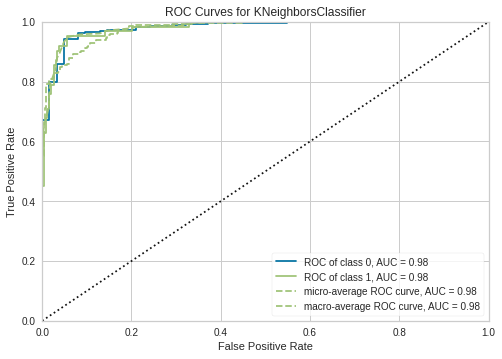

In [ ]:
# Visualizing the model evaluation on test data:
plot_model(model5, plot='auc')

In [ ]:
# Predictions on test data:
predict_model(model5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.903,0.9808,0.5,0.9688,0.6596,0.6096,0.6551


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,y,Label,Score
0,-2.380290,0.213745,-9.505847,2.122735,-1.042708,0.322209,1.831327,-1.157639,1.202228,-0.075633,-4.938150,1.258512,-0.589892,-5.706656,-0.713745,1.820787,0.508783,1.153366,-0.387771,-1.262240,-1.005049,-0.027546,5.316667,2.400906,0.181192,-1.690562,-5.184087,2.837069,-2.675719,-0.849684,1.043973,0.163270,1.870893,-1.636382,-1.528038,-0.673189,-4.842166,3.480405,-1.720307,2.038251,0.888897,0.498252,-0.539198,-0.203556,-0.084834,6.907939,1.209549,0.908968,-0.451763,-0.958133,1,1,0.8894
1,-1.270285,-0.555652,-6.148746,-0.353340,1.136440,0.505821,-0.488214,-1.147030,-0.929316,-0.383940,-3.027857,0.731455,-0.364095,-0.091905,-1.253906,0.222838,-0.161734,-0.274312,-0.775829,-0.592615,-1.079373,1.357608,0.994147,-0.465819,-1.595467,0.063064,1.321019,-0.019779,-0.027984,-0.063238,-0.741417,-0.635407,0.192465,-0.490168,-0.562547,-0.177801,-0.597065,-1.258879,-1.824665,1.662766,-3.140311,1.012426,3.021468,-1.152343,1.204406,-0.742105,-0.645620,-0.106996,3.495588,0.078815,0,0,0.7521
2,3.285024,-0.405893,-12.307508,-2.088221,-0.669185,-1.664515,0.825946,-1.069601,0.622722,-0.368631,-0.897684,0.381207,-1.146404,2.303180,0.349426,-5.250026,0.398961,-0.708565,-0.397713,0.884871,4.172642,0.508798,1.871817,-0.877581,-1.720001,0.616470,-4.692108,-1.922057,-5.401732,-0.521882,0.823851,-0.123907,-3.089183,-4.159323,1.431444,-0.136700,-0.288447,3.165990,-3.165029,0.877105,-2.869649,-0.842497,-3.250650,-0.437531,0.666608,3.620124,0.294584,-0.120705,0.164219,-0.199294,1,0,0.5532
3,1.270900,-0.484589,3.039466,0.691496,0.999677,0.756989,0.805805,2.280787,-0.446359,-0.209551,1.423794,0.576930,-0.072499,-3.946236,1.911024,-2.911615,-0.627855,0.060474,0.380624,-0.394970,4.186686,2.142110,1.263637,-1.058491,-2.310400,1.024868,1.345330,3.158161,-5.225286,-0.140216,0.941779,-0.611091,-0.423179,7.411006,-0.215364,-1.628074,-5.177483,2.215448,-3.126388,1.421848,-16.127605,-0.731870,1.892064,-0.545574,-0.147459,-4.855564,1.877338,-0.608890,3.002701,1.427930,0,0,1.0000
4,-1.339525,-0.630327,5.608542,-2.071267,-0.515902,-1.195632,-0.658256,-2.363575,-0.132016,-0.316895,-0.912888,-1.598590,-0.181239,0.005301,2.241705,-2.225162,2.420235,1.569808,-0.903580,0.425026,-5.640684,1.306243,3.330173,-5.248729,2.934073,0.484684,1.949750,1.252337,1.577172,0.524432,0.189251,-0.456670,0.887139,1.850475,-0.638268,1.514134,2.674031,1.941562,5.187185,-1.007152,12.640871,1.399762,-2.366852,-0.172350,-0.752125,-3.644310,1.058802,-1.252482,2.244712,-0.657245,1,0,0.6477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2.852523,-1.484606,3.566598,-0.778894,-1.567678,0.196810,-0.145717,-0.874744,-1.881989,0.879343,1.391844,0.911093,0.074456,0.083665,-0.411648,0.139309,-0.131840,-0.170346,0.275634,0.863156,-0.813451,2.003062,1.632391,0.460052,-1.993912,-0.348978,-0.654426,3.557042,-0.877634,1.727209,0.590334,0.114764,1.505226,-1.230940,-1.489889,-0.744747,-6.876840,-2.540174,3.392121,3.184397,-4.362971,0.051928,-2.624253,-1.696794,0.463059,-0.778493,-0.080581,1.986588,0.685494,-0.687032,0,0,1.0000
326,3.787459,1.195321,1.894811,-0.785813,-0.200243,-1.131469,-0.509460,1.498220,0.120043,0.531977,5.577908,-0.481344,0.743656,3.989586,-0.728171,3.221226,-0.235332,-0.941600,1.012800,-0.668517,-2.110015,-0.359471,0.660834,-1.003479,-0.185759,1.315244,0.485466,2.612069,3.765413,-0.740290,-1.515944,-1.510934,8.030663,-0.416719,-0.397987,1.498830,0.086496,3.071477,5.570899,6.055131,10.718780,-0.689077,0.997857,0.107303,3.342051,

<a id='autokeras'></a>

### AutoKeras

In [ ]:
from autokeras import StructuredDataClassifier
# from keras_tuner import Objective
from sklearn.metrics import roc_auc_score

#### AutoML

In [ ]:
start_time = datetime.now()

# Creating the AutoML object:
model6 = StructuredDataClassifier(max_trials=3, # Search complexity parameters
                                  overwrite=True # Outputs management parameters
                                  )
# model6 = StructuredDataClassifier(max_trials=3, # Search complexity parameters
#                                   metrics=[roc_auc], objective=Objective('val_roc_auc', direction='max'), # Estimation parameters
#                                   overwrite=True # Outputs management parameters
#                                   )

# Running the search:
model6.fit(x=X_train, y=y_train, epochs=10, validation_split=0.3)

# Total elapsed time:
end_time = datetime.now()
autokeras_time = running_time(start_time=start_time, end_time=end_time)

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.7947368621826172

Best val_accuracy So Far: 0.7947368621826172
Total elapsed time: 00h 00m 12s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
21/21 [==============================] - 1s 2ms/step - loss: 0.5838 - accuracy: 0.7254
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7925
Epoch 3/10
21/21 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7955
Epoch 4/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.8090
Epoch 5/10
21/21 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8418
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 0.8776
Epoch 7/10
21/21 [==============================] - 0s 2ms/step - loss: 0.2674 - accuracy: 0.8985
Epoch 8/10
21/21 [==============================] - 0s 2ms/step - loss: 0.2310 - accuracy: 0.9179
Epoch 9/10
21/21 [==================

#### Assessing the outcomes

Model evaluation

In [ ]:
print(f'Test ROC-AUC: {roc_auc_score(y_test, model6.predict(X_test)):.4f}.\n')
print(f'{model6.objective.name}: {model6.evaluate(X_test, y_test)}.')

11/11 [==============================] - 0s 2ms/step
Test ROC-AUC: 0.7375.

11/11 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8758
val_accuracy: [0.30056077241897583, 0.8757575750350952].
